# Worksheet 12

Name: Woohyeon Her <br> 
UID: U88838753

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Classification <br>
2. Not classification <br>
3. Classification <br>
4. Not classification 

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

I would divide the dataset into two sets, a training set and a testing set. I can then use the training set to train the model, and test it with the testing set to see if it can accurately perform for data is has never seen. We could use instance-based classifiers and such.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

When it is underfitting, it means that the model is too simple to capture the complexities of the data. It could work for many models, or too many models if it is underfitting. Overfitting, on the other hand, means that the model is too complex to the point that it captures the noise and inaccurate data entries. <br>
When the model is underfitting, it has high bias and low variance. When the model is overfitting, it has low bias and high variance.

### K Nearest Neighbors

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

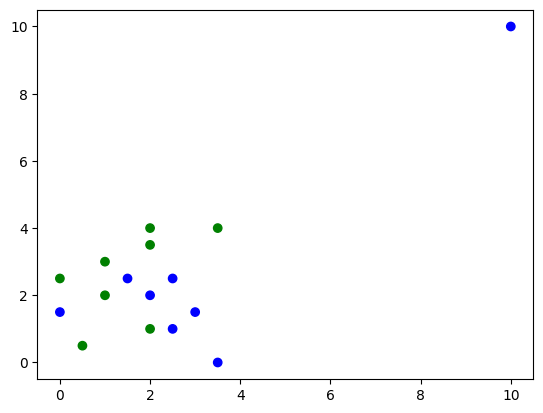

In [5]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

There is one point that could be considered as an outliers.

In [6]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

After removing the one outlier point, I do not think there is any noise points in the dataset. If I must pick one, then I would say the blue dot with y-coordinate of 0 would be a noise point.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

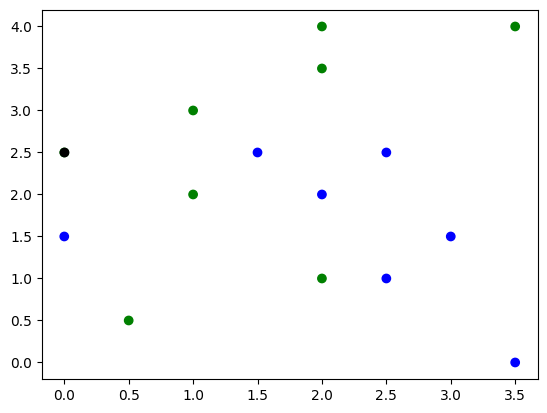

In [7]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter(data["Attribute A"][-1], data["Attribute B"][-1], color="k")
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

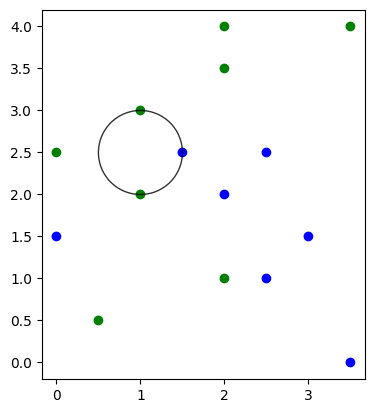

In [8]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def n_closest_to(example, n):
    distances = []
    for a, b in zip(data["Attribute A"], data["Attribute B"]):
        distance = euclidean_distance(example, (a, b))
        distances.append((a, b, distance))
    distances.sort(key=lambda x: x[2])
    return distances[:n]


    

location = ( 1 , 2.5 )
closest_points = n_closest_to(location, 3)
radius = max(closest_points, key=lambda x: x[2])[2]

_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [9]:
def majority(points):
    class_counts = {}
    for a, b, _ in points:  
        for a_orig, b_orig, c in zip(data["Attribute A"], data["Attribute B"], data["Class"]):
            if a == a_orig and b == b_orig:
                if c in class_counts:
                    class_counts[c] += 1
                else:
                    class_counts[c] = 1
                break  

    max_count = max(class_counts.values())
    majority_classes = [class_val for class_val, count in class_counts.items() if count == max_count]
    
    if len(majority_classes) > 1:
        majority_class = sorted(majority_classes)[0]  
    else:
        majority_class = majority_classes[0]

    return majority_class

assigned_class = majority(closest_points)
print(f"The class assigned to the new point is: {assigned_class}")


The class assigned to the new point is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [10]:
count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    training_set = data["Attribute A"][:i] + data["Attribute A"][i+1:]
    prediction = majority(n_closest_to((data["Attribute A"][i], data["Attribute B"][i]), 3))
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count/len(data["Attribute A"]))

overall accuracy =  0.8


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

When I did K ranging from 1 to 20, I could not get the result even after running for more than 1 hour. So I reduced the size to 1 to 3.

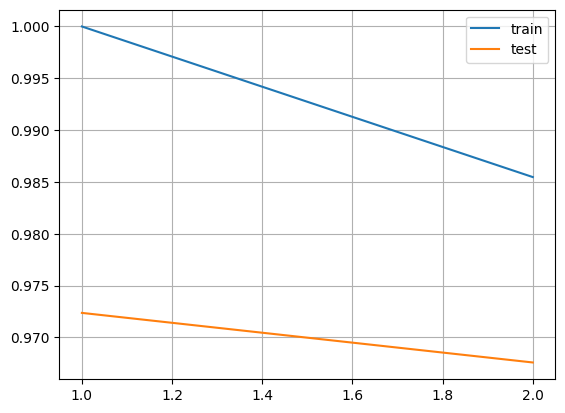

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_accuracies = []
test_accuracies = []

k_values = range(1, 3)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.plot(k_values, train_accuracies, label="train")
plt.plot(k_values, test_accuracies, label="test")
plt.legend()
plt.grid(True)
plt.show()



c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

In [13]:
best_k = k_values[np.argmax(test_accuracies)]
print("Best value of K:", best_k)

# Now let's use the best model to find the nearest neighbors of a randomly chosen image from the test set
random_index = np.random.randint(0, len(X_test))
random_image = X_test[random_index].reshape(28, 28)  # Reshape the image to its original dimensions
random_label = y_test[random_index]

# Train the KNN classifier with the best value of K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Find the indices of the K nearest neighbors of the randomly chosen image
distances, indices = best_knn.kneighbors([X_test[random_index]])

# Plot the randomly chosen image
plt.figure(figsize=(10, 5))
plt.subplot(1, best_k+1, 1)
plt.imshow(random_image, cmap='gray')
plt.title(f"Random Image ({random_label})")

# Plot the K nearest neighbors
for i, index in enumerate(indices[0]):
    neighbor_image = X_train[index].reshape(28, 28)
    neighbor_label = y_train[index]
    plt.subplot(1, best_k+1, i+2)
    plt.imshow(neighbor_image, cmap='gray')
    plt.title(f"Neighbor {i+1} ({neighbor_label})")

plt.tight_layout()
plt.show()

Best value of K: 1


KeyError: 9028

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [32]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(np.linalg.svd, KNeighborsClassifier(n_neighbors=3))
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '<function svd at 0x000001803CFD0E00>' (type <class 'numpy._ArrayFunctionDispatcher'>) doesn't

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the training and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Feature Engineering: Add new features
# 1. Family Size: Combine SibSp and Parch to get total family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# 2. Title: Extract titles from Name
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Fill missing values
train_df.fillna({'Age': train_df['Age'].median(), 'Embarked': 'S'}, inplace=True)
test_df.fillna({'Age': test_df['Age'].median(), 'Fare': test_df['Fare'].median()}, inplace=True)

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Select features and target variable
X_train = train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]
y_train = train_df['Survived']
X_test = test_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs']]

# Impute missing values and scale features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
X_train = scaler.fit_transform(imputer.fit_transform(X_train))
X_test = scaler.transform(imputer.transform(X_test))

# Train the KNN model
k = 5  # choose K
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = knn.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})
submission.to_csv('titanic_submission.csv', index=False)


https://www.kaggle.com/competitions/titanic/submissions#